In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/amazon-labeled-products/amazon_aspect_labeled_products.tsv', delimiter=',')
df = df.iloc[:, 1:]

In [3]:
df.head(5)

,asin,description,title,h_label,s_label,en_label,ec_label
0,B000B5H26O,['Yorkshire Tea never compromise on the qualit...,"Taylors of Harrogate Yorkshire Gold Tea, 160 T...",0,1,0,0
1,B000F3WS7K,['We choose teas from our three favorite origi...,"Taylors of Harrogate Yorkshire Gold, 40 Teabag...",1,1,0,0
2,B000HRS7OM,"['Made with a blend of teas from Assam, Africa...","Taylors of Harrogate Yorkshire Red, 160 Teabags",0,1,0,0
3,B001E5DXY0,['We choose teas from our three favorite origi...,Taylors of Harrogate Yorkshire Gold Loose Leaf...,0,1,0,0
4,B004G90QE6,"['Made with a blend of teas from Assam, Africa...","Taylors of Harrogate Yorkshire Red, 240 Teabags",0,1,0,0


In [4]:
!pip install spacy

In [5]:
!python -m spacy download en_core_web_sm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [6]:
import re
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Loading spaCy
nlp = spacy.load('en_core_web_sm')

# Function to preprocess the description
def preprocess_description(description):
    if re.match(r"^\[.*\]$", description):
        # To remove square brackets and single quotes
        description = re.sub(r"\[|\]|\'", "", description)
    else:
        # To remove square brackets if only one element present in the list
        description = re.sub(r"\[|\]", "", description)
    
    # To convert string to lowercase
    text = description.lower()
    
    # To remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize the tokens using spaCy
    lemmatized_tokens = [token.lemma_ for token in nlp(' '.join(filtered_tokens))]
    
    return lemmatized_tokens

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [7]:
df['clean description'] = df['description'].apply(preprocess_description)

In [8]:
health = ['Genetically modified seeds and crops','GMO','added sugar','high in sugar','natural','palm oil','vegan','toxics','toxic chemicals','organic ','non GMO','health','family','natural','kids','children','at home','natural','pesticides','herbicides','chemicals','agricultural chemicals','grass fed','safer chemicals','U.S. EPA Safer Choice','USDA Organic','organic certification','certified','organic','in-house labels','vegetarian','Gluten free','Ketogenic','High Protein','Sugar free','Energy support','Diet','Caffiene Free','Whole Grain','Low carb','Fat free','healthy','low sodium','lactose free','Dairy free','low fat','no added sugar','plant based','Atkins Diet']
social = ['Vegetarian','Soil Association','nut-free','vegetarian','Gluten free','Ketogenic','High Protein','Sugar free','Energy support','Diet','Caffiene Free','Whole Grain','Low carb','Fat free','Kosher','healthy','low sodium','lactose free','Dairy free','low fat','no added sugar','plant based','Atkins Diet','local','food miles','locally caught','local fishmongers','imported','at home','growers','small-scale farmers','workers rights','intimately connected to farmers on ground','partially owned by farmers','working directly with farmers','made in source country','safe working conditions','socially responsible','responsible supply chain ','producers','farmers','families','women','child labor','poverty','gender equality','children','forced labor','injustice','workforce','fair share','living wage','leave','social security','formal contract','certified','Rainforest Alliance','Fairtrade','Soil Association']
environment = ['sourced sustainably','local','food miles','locally caught','local fishmongers','imported','scarce water sources','Genetically modified seeds and crops','GMO','palm oil free','sustainably sourced palm oil','Albacore tuna','Sourced sustainably','natural','palm oil','microbeads','vegan','toxics','toxic chemicals','organic ','non GMO','at home','over fishing','destruction of habitats','indiscriminate fishing of unwanted species','environmentally unfriendly fishing practices','Pole and line caught','natural','farming method','cruelty-free','animal testing','animal farming industry','pesticides','herbicides','chemicals','agricultural chemicals','ecosystem','insect populations','deforestation','responsibly manufactured','safer chemicals','less energy','reduce energy use','climate action ','energy efficiency ','resource use','glass bottle','frequently recycled','recycled plastic','high recycled content','reusable bottle','refillable canteen','Marine Stewartship Certified','U.S. EPA Safer Choice','USDA Organic','RECYCLED BLENDED Claim Standard','RECYCLED 100 Claim Standard','made in Green by Oeko-Tex','organic certification','certified','organic','Rainforest Alliance','Soil Association','food miles','carbon offset','carbon reduction ','low carbon transformation ','value chain footprint','domesticated farmed animals','Carbon Neutral','Carbon free','Climate neutral','Compact by design','Reducing CO2','Genetically modified seeds and crops','GMO','palm oil free','sustainably sourced palm oil','Albacore tuna','Sourced sustainably','palm oil','vegan','Vegetarian','over fishing','destruction of habitats','indiscriminate fishing of unwanted species','environmentally unfriendly fishing practices','Pole and line caught','herbicides','chemicals','agricultural chemicals','ecosystem','insect populations','deforestation','high welfare farming','domesticated farmed animals','Animal Welfare approved ','Marine Stewartship Certified','vegetarian','Dairy free','plant based']
economic = ['local','food miles','locally caught','local fishmongers','imported','Sourced sustainably','at home','farming method','agricultural chemicals','less energy','reduce energy use','energy efficiency ','value chain footprint','domesticated farmed animals','growers','small-scale farmers','workers rights','intimately connected to farmers on ground','partially owned by farmers','working directly with farmers','made in source country','glass bottle','frequently recycled','recycled plastic','high recycled content','Reducing CO2','RECYCLED BLENDED Claim Standard','made in Green by Oeko-Tex']

In [9]:
# The keywords are then split into a list of words to handle phrases in keywords
health = [word for term in health for word in term.split()]
social = [word for term in social for word in term.split()] 
environment = [word for term in environment for word in term.split()]
economic = [word for term in economic for word in term.split()]

In [10]:
# Function to preprocess the keywords
def preprocess_keywords(keywords):
    # To convert the keywords to lowercase
    keywords = [keyword.lower() for keyword in keywords]
    
    # To remove special characters and digits
    keywords = [re.sub(r'[^a-zA-Z]', ' ', keyword) for keyword in keywords]
    
    # Tokenize the keywords
    tokenized_keywords = [word_tokenize(keyword) for keyword in keywords]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_keywords = [word for tokens in tokenized_keywords for word in tokens if word not in stop_words]
    
    # Lemmatize the tokens using spaCy
    lemmatized_keywords = [token.lemma_ for token in nlp(' '.join(filtered_keywords))]
    
    return lemmatized_keywords


In [11]:
# Preprocessing the keywords
clean_health = preprocess_keywords(health)
clean_social = preprocess_keywords(social)
clean_environment = preprocess_keywords(environment)
clean_economic = preprocess_keywords(economic)

In [12]:
#Remove duplicates from the keyword lists
clean_health = list(set(clean_health))
clean_social = list(set(clean_social))
clean_environment = list(set(clean_environment))
clean_economic = list(set(clean_economic))

In [13]:
# Loading new dataset
new_data = pd.read_csv("/kaggle/input/amazon-dataset-new/amazon_dataset_new.csv")
new_annotated_data = []

# Keywords for semantic tagging for each category
category_keywords_list = {
    "health": clean_health,
    "social": clean_social,
    "environment": clean_environment,
    "economic": clean_economic
}

for index, row in new_data.iterrows():
    description = row["description"]
    
    # Process the description using spaCy
    doc = nlp(description)
    
    entities = []
    
    # Perform semantic tagging based on keywords
    for category, keywords in category_keywords_list.items():
        for keyword in keywords:
            for token in doc:
                if token.text.lower() == keyword:
                    entities.append((token.idx, token.idx + len(token.text), category))
                    break  # Break if a keyword match is found
    
    # Append annotated data to the new_annotated_data list
    if entities:
        new_annotated_data.append({"text": description, "entities": entities})

In [14]:
import pandas as pd

categories = ['health', 'social', 'environment', 'economic']

# Initialize a dictionary to store binary labels for each category
binary_labels = {category: [] for category in categories}
binary_labels['description'] = []

# Extract text and entities
for entry in new_annotated_data:
    text = entry['text']
    labels = [0] * len(categories)  # Initialize all labels to 0
    for _, _, category in entry['entities']:
        if category in categories:
            labels[categories.index(category)] = 1  # Set label to 1 if category is present
    for idx, category in enumerate(categories):
        binary_labels[category].append(labels[idx])
    binary_labels['description'].append(text)

# Create DataFrame from binary labels dictionary
df_annotated = pd.DataFrame(binary_labels)

In [15]:
# Define the new order of columns
new_column_order = ['description','health','social','environment','economic']

# Rearrange the columns based on the new order
df_annotated = df_annotated[new_column_order]

# Rename specific columns
column_rename_mapping = {'health': 'h_label', 'social': 's_label','environment': 'en_label', 'economic': 'ec_label'}

df_annotated.rename(columns=column_rename_mapping, inplace=True)

In [16]:
# Combining multiple binary labels into a single multilabel variable
df_annotated['multi_labels'] = df_annotated[['h_label', 's_label', 'en_label', 'ec_label']].apply(lambda x: x.tolist(), axis=1)

In [17]:
df_annotated['clean description'] = df_annotated['description'].apply(preprocess_description)

In [18]:
df_annotated.head(5)

,description,h_label,s_label,en_label,ec_label,multi_labels,clean description
0,"['The thick, rich texture features whole rolle...",1,1,1,1,"[1, 1, 1, 1]","[thick, rich, texture, feature, whole, roll, o..."
1,"['', ""After a run with friends, throw in a few...",1,1,1,1,"[1, 1, 1, 1]","[run, friend, throw, water, couple, gluten, fr..."
2,"['Special K Pastry Crispsare an indulgent, 100...",1,1,1,1,"[1, 1, 1, 1]","[special, k, pastry, crispsare, indulgent, cal..."
3,"[""Gluten free oatcakes. Naturally versatile Th...",1,1,1,1,"[1, 1, 1, 1]","[gluten, free, oatcake, naturally, versatile, ..."
4,['Made with organic wheat bran flakes and plum...,1,1,1,0,"[1, 1, 1, 0]","[make, organic, wheat, bran, flake, plump, org..."


In [19]:
# Creating training and validation sets
train_df = df
val_df = df_annotated

# Printing the shapes of the training and validation sets
print("Training set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)

Training set shape: (9048, 8)
Validation set shape: (42, 7)


In [20]:
!pip install corextopic

In [21]:
# Extracting preprocessed descriptions from the training set
preprocessed_descriptions = train_df['clean description']

# Combine preprocessed keywords and descriptions
#preprocessed_data = clean_health + clean_social + clean_economic + clean_environment + preprocessed_descriptions
preprocessed_data = []
preprocessed_data.extend(clean_health)
preprocessed_data.extend(clean_social)
preprocessed_data.extend(clean_environment)
preprocessed_data.extend(clean_economic)
preprocessed_data.extend(item for sublist in preprocessed_descriptions for item in sublist)

# Creating the vocabulary which is a set of all words in keywords and description
vocabulary = set(preprocessed_data)

# Remove any lower case characters from the vocabulary
vocabulary = {word for word in vocabulary if not any(char.isupper() for char in word)}

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating an instance of CountVectorizer
vectorizer = CountVectorizer(binary=True)

# Fit the vectorizer on the vocabulary
vectorizer.fit(vocabulary)

# Vectorize the vocabulary
X_train = vectorizer.transform(train_df['clean description'].apply(' '.join))

# Print the shape of the vectorized data
print("Vectorized train set shape:", X_train.shape)

Vectorized train set shape: (9048, 12227)


In [23]:
from corextopic import corextopic as ct

anchor_words = [
    clean_health,       # Anchors for Topic 1 (Health)
    clean_social,       # Anchors for Topic 2 (Social)
    clean_environment,  # Anchors for Topic 3 (Environment)
    clean_economic     # Anchors for Topic 4 (Economic)
]

vocab = vectorizer.get_feature_names_out()

# Set anchor_strength parameter
anchor_strength = 15

# Number of topics to extract
num_topics = 4

topic_model = ct.Corex(n_hidden=num_topics, seed=42)
topic_model.fit(X_train, words=vocab, anchors=anchor_words, anchor_strength=anchor_strength)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: natural, sugar, free, oil, gluten, fat, high, non, gmo, organic
1: high, free, gluten, make, small, source, food, certify, fat, family
2: high, use, organic, certify, make, free, water, food, natural, gmo
3: use, high, small, make, food, source, farmer, work, content, farm


In [24]:
#Evaluation of the model

# Extract the preprocessed description from the validation set
preprocessed_val = val_df['clean description'].apply(' '.join)

# Fit the vectorizser on preprocessed description of validation set
X_val = vectorizer.transform(preprocessed_val)
topic_model.transform(X_val)

# Get the predicted topics
predicted_topics = topic_model.predict(X_val)

# Get the original labels from the dataset
true_labels = val_df['multi_labels'].tolist()

In [25]:
predicted_topics_list = predicted_topics.tolist()
predicted_topics_list = [[int(topic) for topic in sample] for sample in predicted_topics]

In [26]:
from sklearn.metrics import classification_report

# calculate precision, recall and f1-score
print(classification_report(
    true_labels,
    predicted_topics_list,
    output_dict=False,
    zero_division=0,
    target_names=['health', 'social', 'environment','economic']
))

              precision    recall  f1-score   support

      health       1.00      0.76      0.86        42
      social       1.00      0.62      0.76        42
 environment       1.00      0.58      0.73        38
    economic       1.00      0.44      0.61        25

   micro avg       1.00      0.62      0.76       147
   macro avg       1.00      0.60      0.74       147
weighted avg       1.00      0.62      0.76       147
 samples avg       0.83      0.59      0.67       147



In [27]:
from sklearn.metrics import accuracy_score

# Convert lists to numpy arrays
true_labels_array = np.array(true_labels)
predicted_labels_array = np.array(predicted_topics_list)

# Flatten the arrays to match the shape expected by accuracy_score
true_labels_flat = true_labels_array.flatten()
predicted_labels_flat = predicted_labels_array.flatten()

# Calculate accuracy
accuracy = accuracy_score(true_labels_flat, predicted_labels_flat)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [28]:
from sklearn.metrics import hamming_loss

# Calculate hamming loss
print("Hamming Loss:",hamming_loss(true_labels, predicted_topics_list))

Hamming Loss: 0.3333333333333333


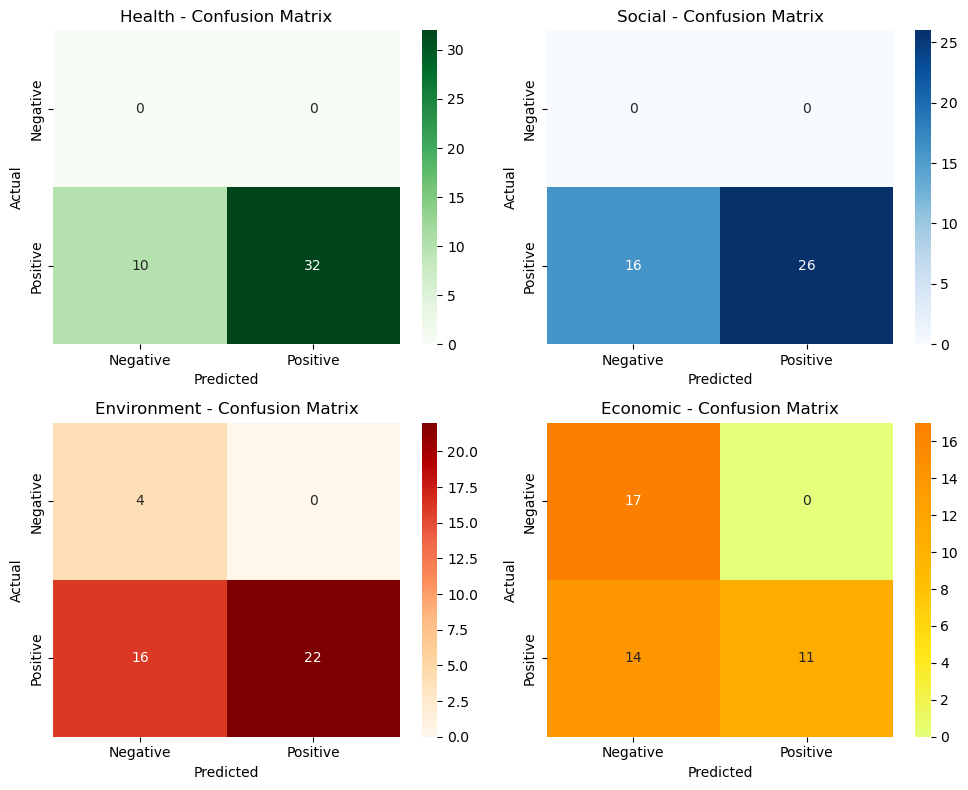

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

h_true_labels = [x[0] for x in true_labels]
h_predicted_labels = [x[0] for x in predicted_topics_list]
s_true_labels = [x[1] for x in true_labels]
s_predicted_labels = [x[1] for x in predicted_topics_list]
en_true_labels = [x[2] for x in true_labels]
en_predicted_labels = [x[2] for x in predicted_topics_list]
ec_true_labels = [x[3] for x in true_labels]
ec_predicted_labels = [x[3] for x in predicted_topics_list]

# Create confusion matrix
h_conf_matrix = confusion_matrix(h_true_labels, h_predicted_labels)
s_conf_matrix = confusion_matrix(s_true_labels, s_predicted_labels)
en_conf_matrix = confusion_matrix(en_true_labels, en_predicted_labels)
ec_conf_matrix = confusion_matrix(ec_true_labels, ec_predicted_labels)

# Subplot for displaying the confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot each confusion matrix using seaborn heatmap
class_names = ['Negative', 'Positive']

sns.heatmap(h_conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names, ax=axes[0, 0])
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')
axes[0, 0].set_title('Health - Confusion Matrix')

sns.heatmap(s_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[0, 1])
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')
axes[0, 1].set_title('Social - Confusion Matrix')

sns.heatmap(en_conf_matrix, annot=True, fmt='d', cmap='OrRd', xticklabels=class_names, yticklabels=class_names, ax=axes[1, 0])
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')
axes[1, 0].set_title('Environment - Confusion Matrix')

sns.heatmap(ec_conf_matrix, annot=True, fmt='d', cmap='Wistia', xticklabels=class_names, yticklabels=class_names, ax=axes[1, 1])
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')
axes[1, 1].set_title('Economic - Confusion Matrix')

plt.tight_layout()
plt.show()

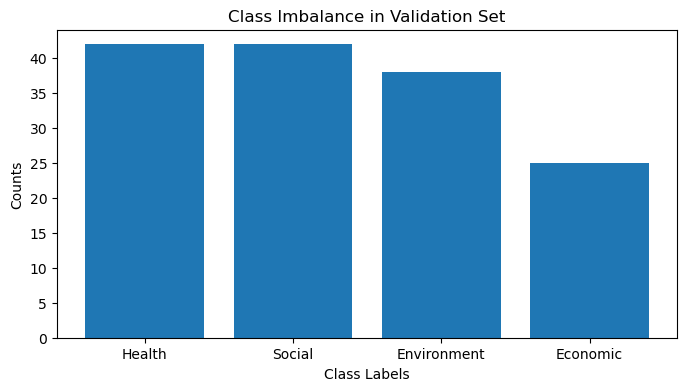

In [30]:
true_labels = val_df['multi_labels'].tolist()

# Initialize counters for each class label
class_counts = {0: 0, 1: 0, 2: 0, 3: 0}

# Calculate class counts
for labels in true_labels:
    for i, count in enumerate(labels):
        class_counts[i] += count

class_labels = ['Health', 'Social', 'Environment', 'Economic']
counts = [class_counts[i] for i in range(len(class_labels))]

plt.figure(figsize=(8, 4))
plt.bar(class_labels, counts)
plt.xlabel('Class Labels')
plt.ylabel('Counts')
plt.title('Class Imbalance in Validation Set')
plt.show()